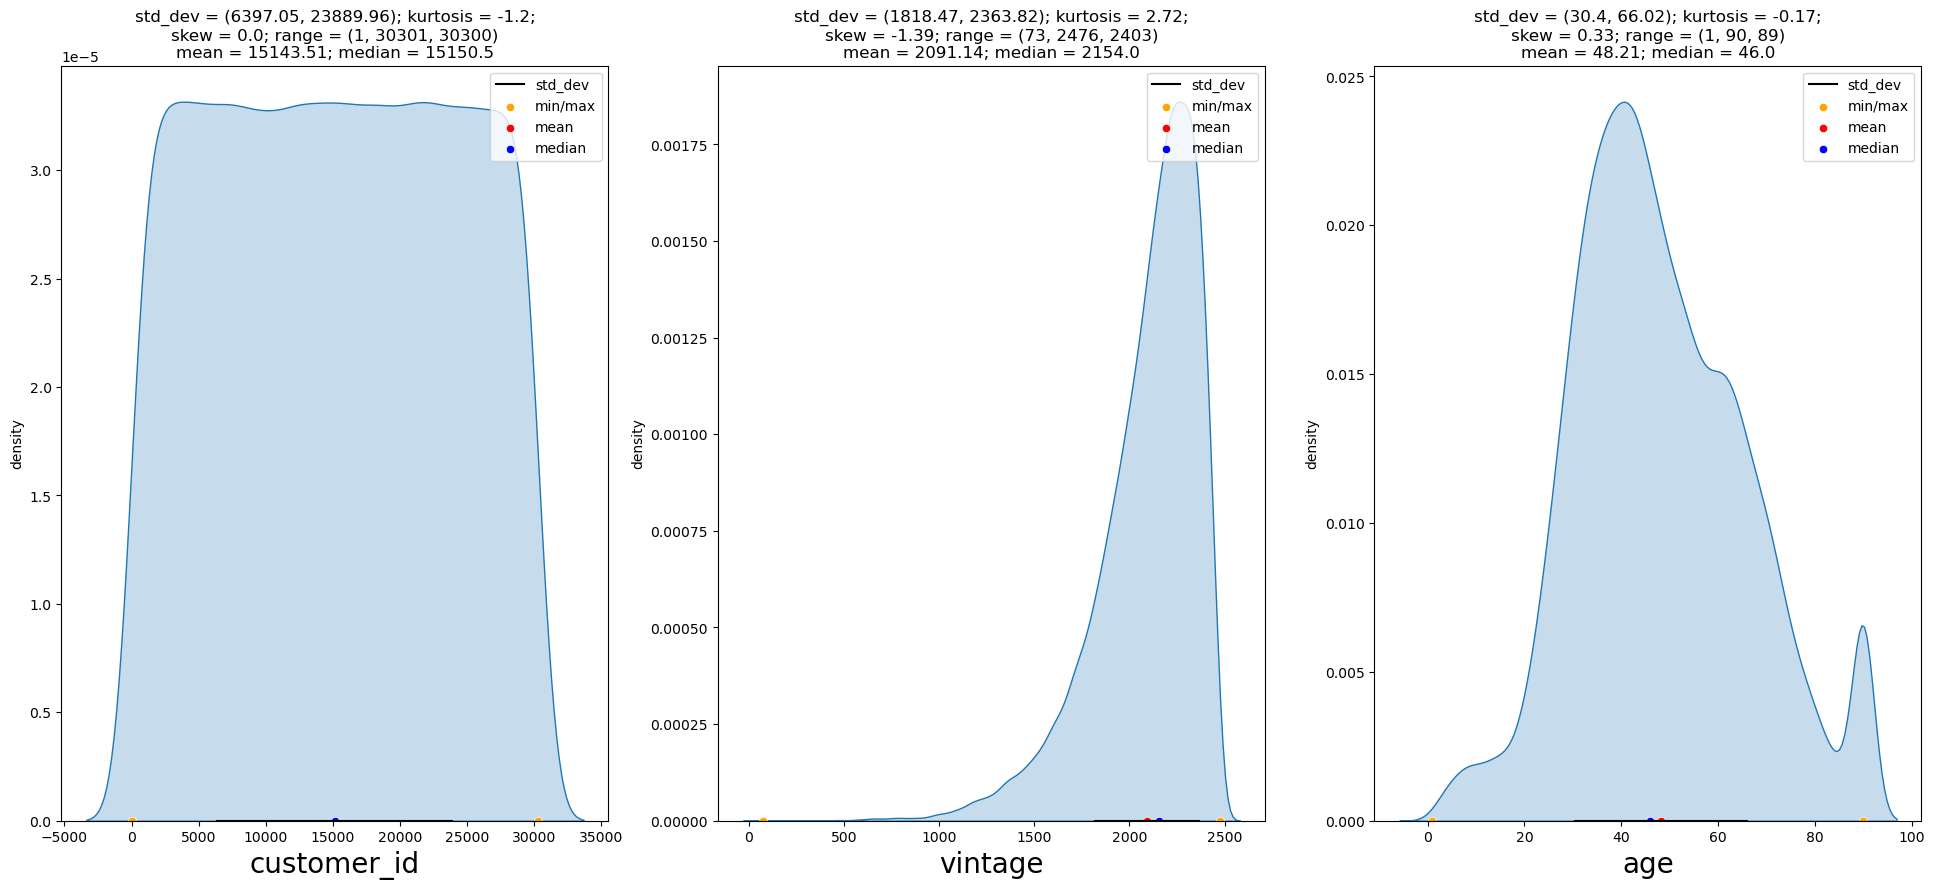

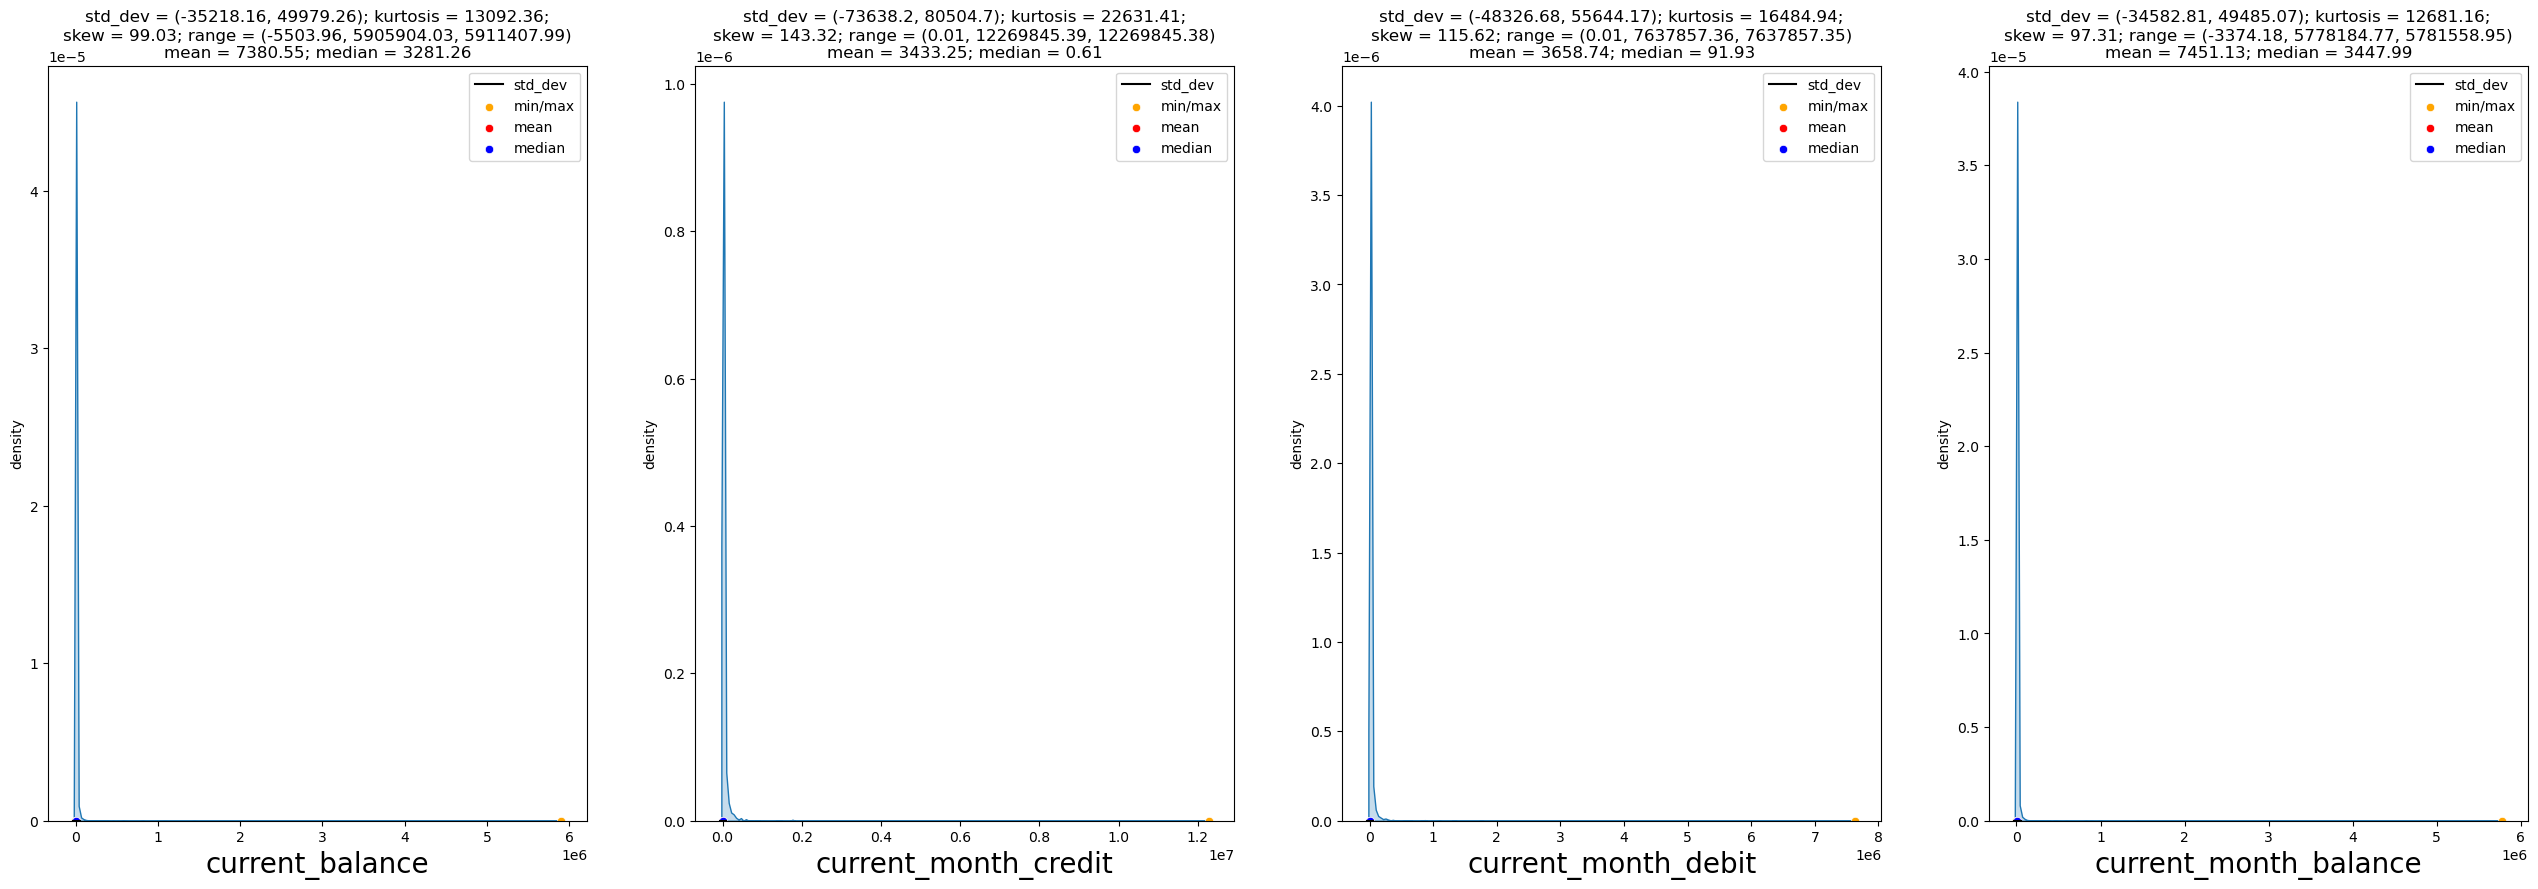

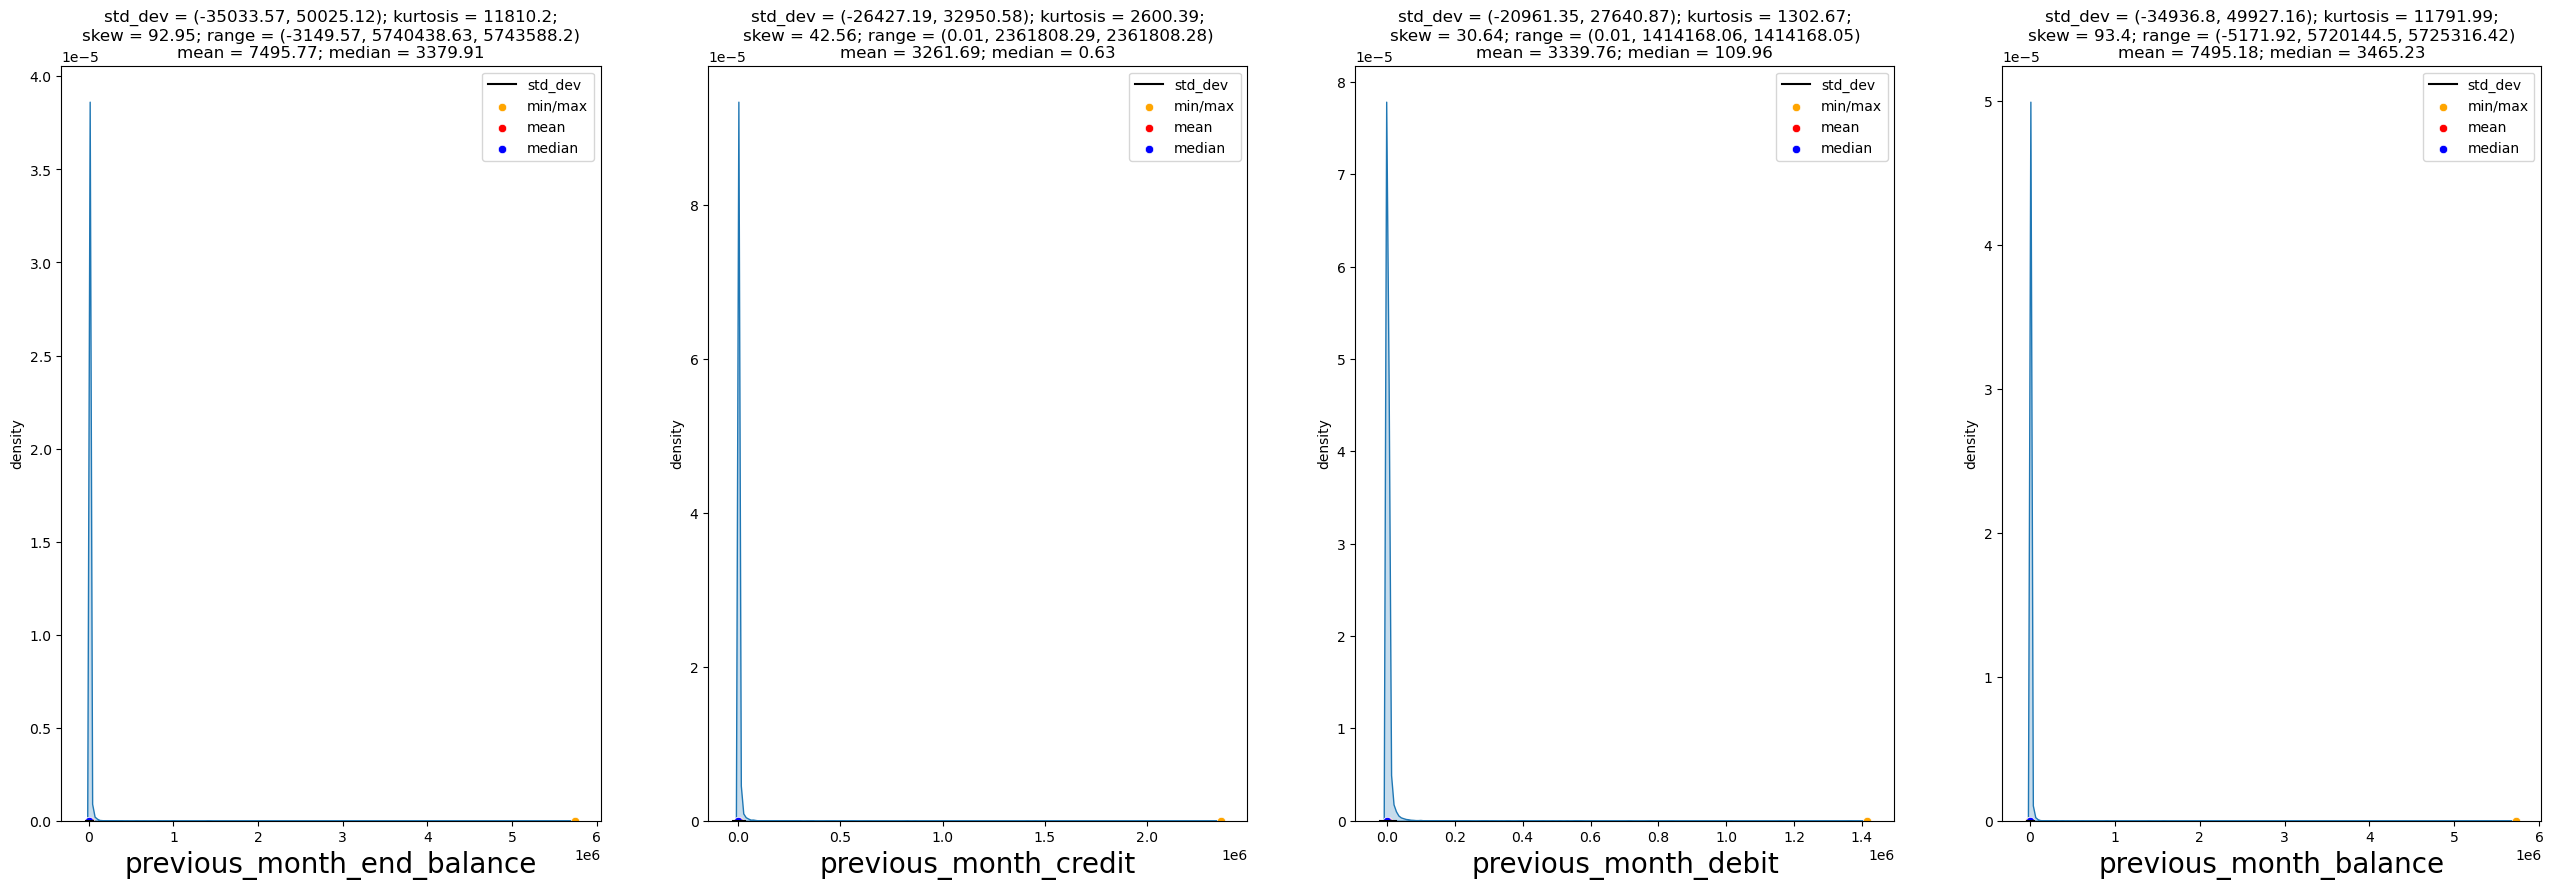

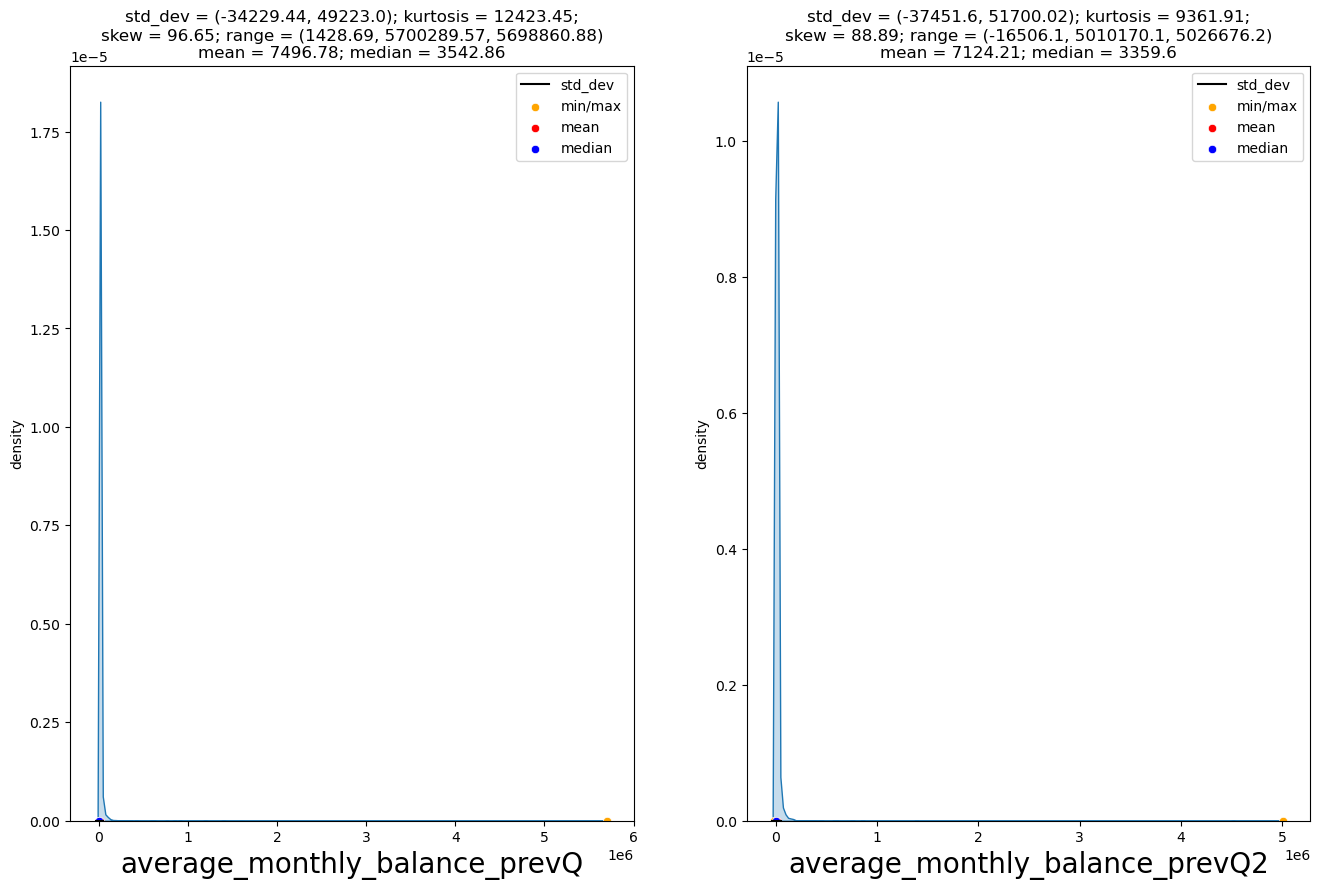

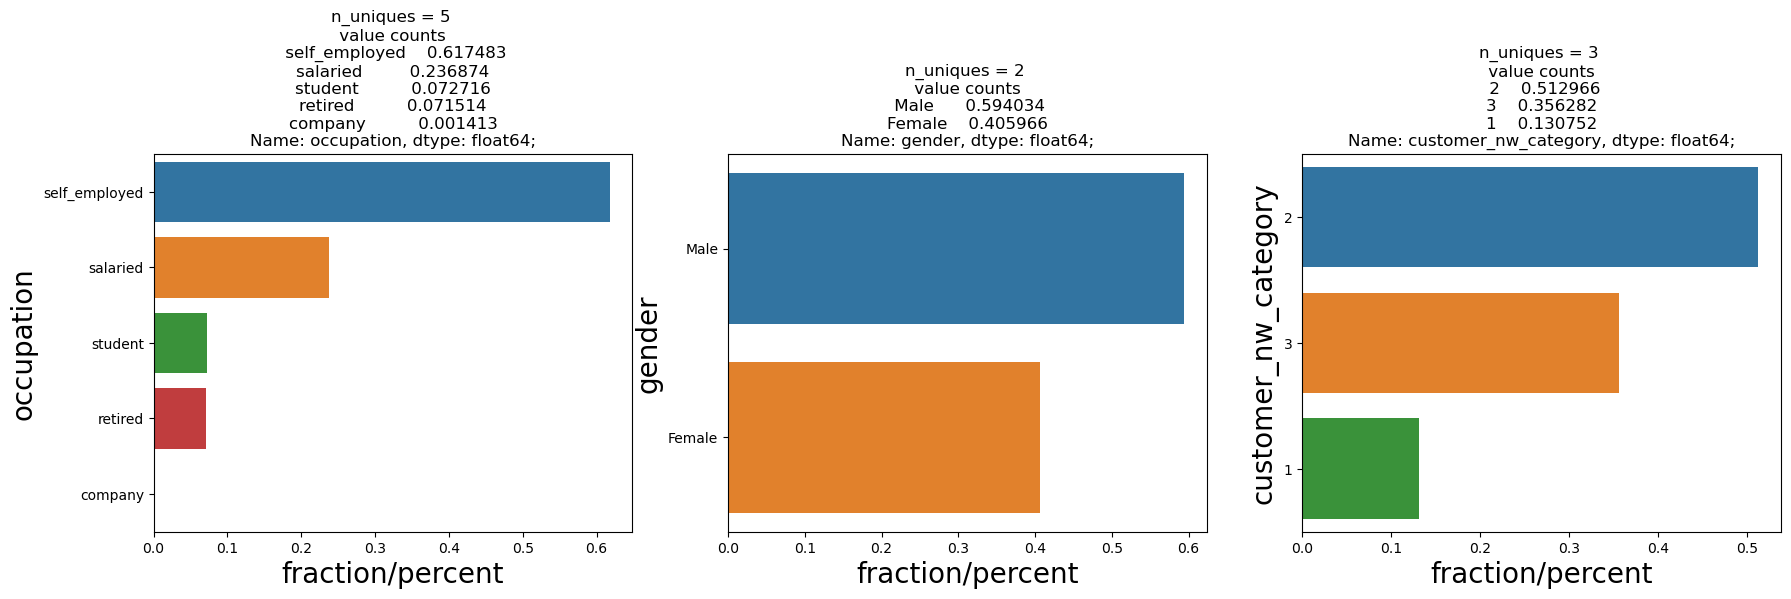

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as pt
import seaborn as sns
import warnings
def UVA_category(data, var_group):
    size = len(var_group)
    pt.figure(figsize = (7*size,5), dpi = 100)
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        pt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        pt.xlabel('fraction/percent', fontsize = 20)
        pt.ylabel('{}'.format(i), fontsize = 20)
        pt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    
def uva_numerical(df,var_group):
    size = len(var_group)
    pt.figure(figsize = (8*size,10),dpi=100)
    for j,i in enumerate(var_group):
        min1 = df[i].min()
        max1 = df[i].max()
        rn = max1- min1
        mean = df[i].mean()
        median = df[i].median()
        std = df[i].std()
        skew = df[i].skew()
        kurt = df[i].kurtosis()
        points = mean-std,mean+std
        pt.subplot(1,size,j+1)
        sns.kdeplot(df[i],shade = True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([min1,max1], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        pt.xlabel('{}'.format(i), fontsize = 20)
        pt.ylabel('density')
        pt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(min1,2),round(max1,2),round(rn,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

warnings.filterwarnings("ignore")
path = os.getcwd() + '/'+ 'Datasets'+'/'+'churn_prediction.csv'
df = pd.read_csv(path)
df['churn'] = df['churn'].astype('category')
df['branch_code'] = df['branch_code'].astype('category')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')
df['city'] = df['city'].astype('category')
df['dependents'] = df['dependents'].astype('category')
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')
date  = pd.DatetimeIndex(df['last_transaction'])
# last day of year when transaction was done
df['doy_ls_tran'] = date.dayofyear
# week of year when last transaction was done
df['woy_ls_tran'] = date.weekofyear
# month of year when last transaction was done
df['moy_ls_tran'] = date.month
# day of week when last transaction was done
df['dow_ls_tran'] = date.dayofweek
df.drop('last_transaction',axis=1,inplace=True)
customer_details  = ['customer_id','vintage','age']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']
uva_numerical(df,customer_details)
uva_numerical(df,current_month)
uva_numerical(df,previous_month)
uva_numerical(df,previous_quarters)
UVA_category(df, ['occupation', 'gender', 'customer_nw_category'])